<a href="https://colab.research.google.com/github/AAyyoouubb/TP_ML/blob/master/FIRE/Project_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Our dataset exist in google drive in a folder **project_machinglearning_S3**, therefore we  will open this folder as root directory

In [207]:
from google.colab import drive
drive.mount('/content/drive/')

# change to default path of datasets
import os
os.chdir("/content/drive/MyDrive/project_machinglearning_S3")
! ls

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
classification_data7.csv  data8.csv	   Part2_data4.rar
data4.csv		  Part1_data8.rar



Cheching the existing the two part of the datasets:
* **data8.csv** For First Part
* **data4.csv** For Second Part

In [208]:
! ls data*

data4.csv  data8.csv


Importing libraries,
* **numpy** for matrix structures
* **pandas** for reading tables
* **matplotlib**  for visualization


In [209]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix as sm
import random
%matplotlib inline
import warnings  
warnings.filterwarnings('ignore')

### **First Part:**

Reading the data using `pandas`.

In [210]:
data =pd.read_csv("data8.csv")

Spliting the data into **80%** training set and **20%** testing set.

In [211]:
y=data.y.values.reshape(-1,1)
print(y.shape)
x=data["x"].values.reshape(-1,1)


X = np.concatenate((np.ones((len(x),1)),x),axis=1)
print(X.shape)

trainingSplit = int(.8 * data.shape[0])

xtrain = X[:trainingSplit]
ytrain = y[:trainingSplit] 
xtest = X[trainingSplit:]
ytest = y[trainingSplit:]

(230, 1)
(230, 2)



**Q1.**


1.  There are 2 features `x` and `y`.
2.  The size of training set is **184** and the size of testing set is 46.
3.  Bellow the describtion of the data: 

feature| mean | median | min | max
--- | --- | --- | --- | ---
x | 11.45|-0.1 |0|22.9
y | 25.94| 157.93|-0.43|50.44



In [212]:
print(*data.columns)

x y


In [213]:
print(xtrain.shape,ytrain.shape)
print(xtest.shape,ytest.shape)

(184, 2) (184, 1)
(46, 2) (46, 1)


In [214]:
print(data.describe())


                x           y
count  230.000000  230.000000
mean    11.450000   25.945763
std      6.653946   13.597779
min      0.000000   -0.431536
25%      5.725000   14.343240
50%     11.450000   26.286147
75%     17.175000   37.487885
max     22.900000   50.444631


***Q2.***

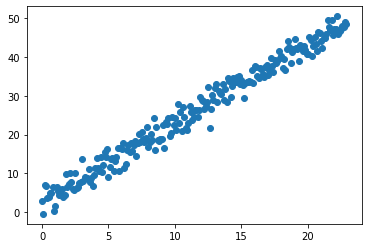

In [215]:
plt.scatter(x, y)

**Q3.** According to the ploting, the data is linear.
It is Supervised because there is no missing data because the size of features equal the size of labels.

**Q4.** Different metrics :


**Q5.** Lets build the following functions


In [216]:
m = data.shape[0]

# calculate gradient
def grad(theta,X,y):
    dJ = 1/m*np.sum((X.dot(theta)-y)*X,axis=0).reshape(-1,1)
    return dJ

In [217]:
def cost(theta,X,y):
    J = np.sum((X.dot(theta)-y)**2,axis=0)[0]
    return J



In [218]:
def armijo(X,y,theta,grad=grad,cost=cost):
    eps = .001
    eta = 10
    alpha =10e-15    
    gradient = grad(theta,X,y)
    phiprzero = -gradient.T.dot(gradient)
    phizero = cost(theta,X,y)
    while  cost(theta-alpha*gradient,X,y)<= alpha * phiprzero * eps + phizero :
      alpha*=eta
    return alpha/eta
# theta = np.array([[0],[0]])
# print(armijo(X,y,theta))

In [219]:
def GD(X,y,learning_rate = 0.001,epochs=1000,TOL=1e-7,use_armijo = False):
    theta = np.array([[0]]*X.shape[1])
    print(theta)
    theta_history = [theta]
    J_history = [cost(theta,X,y)]
    
    thetanew = theta
    print(f'epoch \t Cost(J,X,y) \t')
    for epoch in range(epochs):
        if epoch%100 == 0:
            print(f'{epoch:5d}\t{J_history[-1]:7.4f}\t')
        dJ = grad(theta,X,y)
        J = cost(theta,X,y)
        if use_armijo:learning_rate= armijo(X,y,theta)
        thetanew = theta - learning_rate*dJ
        theta_history.append(thetanew)
        J_history.append(J)
        
        if np.sum((thetanew - theta)**2) < TOL:
            print('Convergence achieved.')
            break
        theta = thetanew

    return thetanew,theta_history,J_history

[[0]
 [0]]
epoch 	 Cost(J,X,y) 	
    0	197174.0059	
  100	1122.3142	
  200	1015.0096	
Convergence achieved.


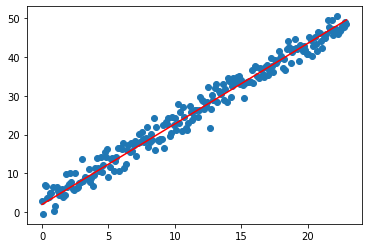

In [220]:
theta,theta_history,J_history = GD(X,y,use_armijo=1)
plt.scatter(data.x.values, y)
Y_pred = X.dot(theta)
plt.plot([min(x), max(x)], [min(Y_pred), max(Y_pred)], color="red") # predicted
plt.show()

[[0]
 [0]]
epoch 	 Cost(J,X,y) 	
    0	197174.0059	
  100	1329.3509	
  200	1310.2442	
  300	1292.0714	
  400	1274.7871	
  500	1258.3476	
  600	1242.7117	
  700	1227.8402	
  800	1213.6957	
  900	1200.2426	
[[0]
 [0]]
epoch 	 Cost(J,X,y) 	
    0	197174.0059	
  100	1310.4259	
  200	1274.9472	
  300	1242.8528	
  400	1213.8198	
  500	1187.5563	
  600	1163.7980	
  700	1142.3059	
  800	1122.8640	
  900	1105.2766	
[[0]
 [0]]
epoch 	 Cost(J,X,y) 	
    0	197174.0059	
  100	1292.4128	
  200	1242.9940	
  300	1200.4755	
  400	1163.8940	
  500	1132.4203	
  600	1105.3414	
  700	1082.0435	
  800	1061.9987	
  900	1044.7528	
[[0]
 [0]]
epoch 	 Cost(J,X,y) 	
    0	197174.0059	
  100	1122.3142	
  200	1015.0096	
Convergence achieved.


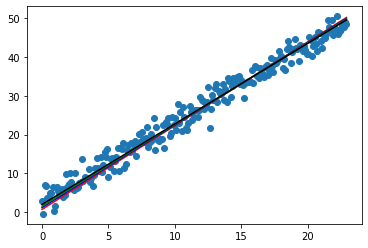

In [221]:
models = []
models.append( GD(X,y,learning_rate = 0.001))
models.append( GD(X,y,learning_rate = 0.002))
models.append( GD(X,y,learning_rate = 0.003))
models.append( GD(X,y,use_armijo=1))

# Making predictions
plt.scatter(data.x.values, y)

colors = ['red' , 'blue', "green","black"]
for color,model in zip(colors,models):
  theta = model[0]
  Y_pred = X.dot(theta)
  plt.plot([min(x), max(x)], [min(Y_pred), max(Y_pred)], color=color) # predicted
plt.show()

### **Second Part**

In [222]:
data = pd.read_csv("data4.csv")

Spliting to traing and testing

In [223]:
y=data.y.values.reshape(-1,1)
print(y.shape)
x=data["x"].values.reshape(-1,1)


# X = np.concatenate((np.ones((len(x),1)),x),axis=1)
# print(X.shape)

trainingSplit = int(.8 * data.shape[0])

xtrain = X[:trainingSplit]
ytrain = y[:trainingSplit] 
xtest = X[trainingSplit:]
ytest = y[trainingSplit:]

(240, 1)


**1.1.** The data contain 2 features `x` and `y`.

In [224]:
print(*data.columns)

x y


**1.2.**  The size of training set is **192**, the size of testing size is **48**.









In [225]:
print(xtrain.shape,ytrain.shape)
print(xtest.shape,ytest.shape)

(192, 2) (192, 1)
(38, 2) (48, 1)


**1.3.** According to the ploting, The data is polynomial.

The data is Supervided : There is no missing data because the size of features equal the size of labels

**1.4.** bellow the describtion of our dataset :

 feature| mean | median | min | max
--- | --- | --- | --- | ---
x | -0.1|-0.1 |-24|23.8
y | 193.31| 157.39|-67.13|578.49

In [226]:
data.describe()

,x,y
count,240.000000,240.000000
mean,-0.100000,193.313566
std,13.885244,172.459213
min,-24.000000,-67.135789
25%,-12.050000,41.201270
50%,-0.100000,157.391379
75%,11.850000,324.378494
max,23.800000,578.496869


***Q2.***

Using `matplotlib.scatter` to plot our **2D** dataset as scatters.

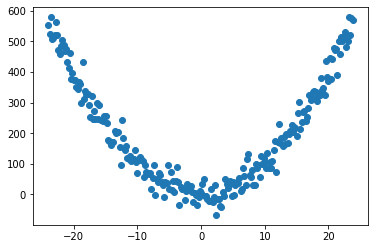

In [227]:
plt.scatter(x, y)


***Q3.*** As showen in the figure above. Our dataset is polynomial of degree 2.

The nature of the dataset is **supervised** because the data is labeled.

***Q4.*** Different metrics :


**QQ2.** The Polynomial regression algorithm

In [228]:
def tf(x,deg):
  X=np.ones((len(x),1))
  for i in range(1,deg+1):
    X = np.concatenate((X,x**i),axis=1)
  return X

**QQ.3**  k = 2

**QQ4.** 

In [229]:
X =tf(x,deg=2)
print(X.shape)

(240, 3)


[[0]
 [0]
 [0]]
epoch 	 Cost(J,X,y) 	
    0	16077213.3860	
Convergence achieved.


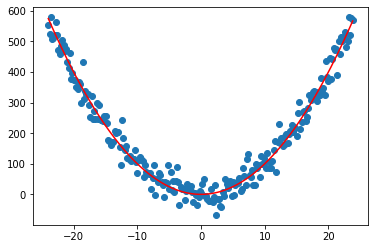

In [230]:

theta,theta_history,J_history = GD(X,y,use_armijo=1)
plt.scatter(data.x.values, y)
Y_pred = X.dot(theta)
plt.plot(x, Y_pred, color="red") # predicted
plt.show()

### PART3

**Q1.** 

**Q2.** 

In [231]:
ynorm = y.copy()
maxy = np.max(y)
miny = np.min(y)
ynorm = (y-miny)/(maxy - miny) 
print(ynorm[:10,0])

[0.96072837 0.91473797 1.         0.89236765 0.89732794 0.90998366
 0.97360406 0.90918532 0.83223712 0.81263379]


In [232]:
def sigmoid(z): return 1 / (1 + np.e**(-z))
m = data.shape[0]

# calculate gradient
def grad2(theta,X,y):
    y_hat = sigmoid(dot(X, theta))
    dJ = 1/m*np.sum((y_hat-y)*X,axis=0).reshape(-1,1)
    return dJ
def cost2(theta,X, y):         
    z = dot(X, theta)
    predict_1 = y * log(sigmoid(z))
    predict_0 = (1 - y) * log(1 - sigmoid(z))
    return -sum(predict_1 + predict_0) / len(X)

def LR(X,y,learning_rate = 0.001,epochs=1000,TOL=1e-7,use_armijo = False):
    theta = np.array([[0]]*X.shape[1])
    print(theta)
    theta_history = [theta]
    J_history = [cost2(theta,X,y)]
    
    thetanew = theta
    print(f'epoch \t Cost2(J,X,y) \t')
    for epoch in range(epochs):
        if epoch%100 == 0:
            print(f'{epoch:5d}\t{J_history[-1]}\t')
        dJ = grad2(theta,X,y)
        J = cost2(theta,X,y)
        if use_armijo:learning_rate= armijo(X,y,theta,grad2,cost2)
        thetanew = theta - learning_rate*dJ
        theta_history.append(thetanew)
        J_history.append(J)
        
        if np.sum((thetanew - theta)**2) < TOL:
            print('Convergence achieved.')
            break
        theta = thetanew

    return thetanew,theta_history,J_history

[[0]
 [0]
 [0]]
epoch 	 Cost2(J,X,y) 	
    0	[0.69314718]	
Convergence achieved.


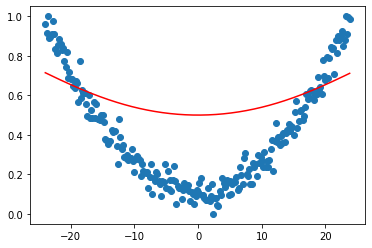

In [233]:
theta,theta_history,J_history = LR(X,ynorm,use_armijo=1)
plt.scatter(x, ynorm)
Y_pred = sigmoid( X.dot(theta))
plt.plot(x,Y_pred, color="red") # predicted
plt.show()

In [234]:
print(X.shape)

(240, 3)
